<b> Muhammad Junaid Akram - 
    MSCS-9 - 
    320097 
</b>

In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import ipyplot #Opensource library used to display images in horizontal manner & saving space
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter, gaussian_laplace

In [2]:
%run functions

<b> Task 2.1 (Show greyscale images & coloured images) </b>

Greyscale Images



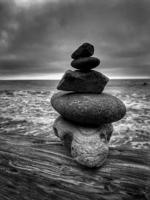
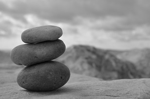
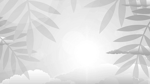
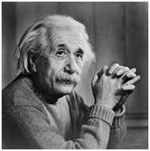
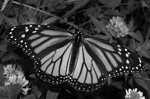
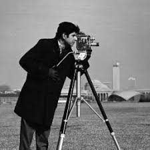
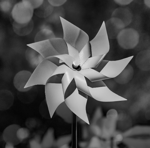
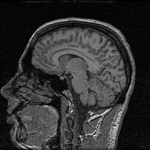
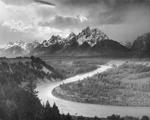


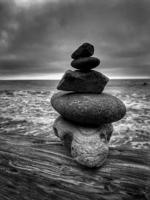
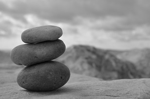
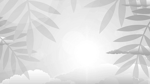
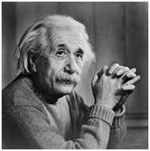
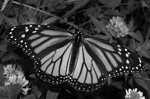
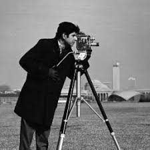
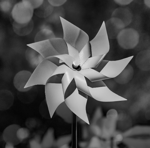
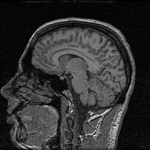
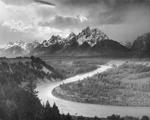

Coloured Images



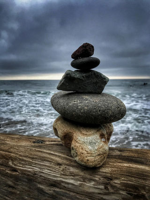
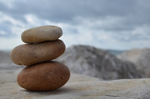
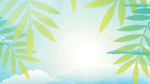
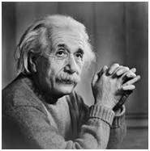
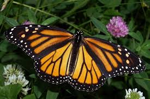
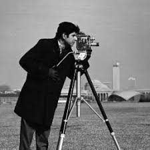
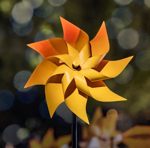
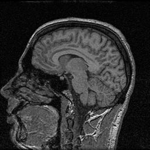
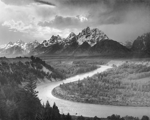


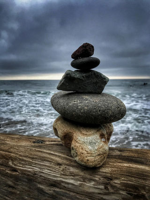
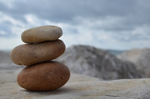
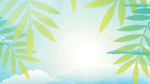
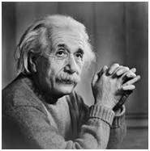
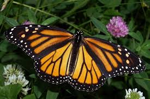
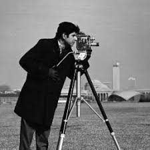
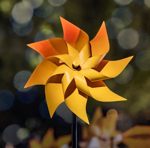
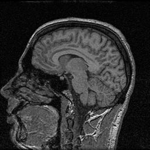
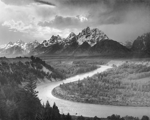

In [3]:
images_grey = []
images = []
for img_path in glob.glob('images/*.*'):
    images_grey.append(cv.imread(img_path,0)) 
    images.append(cv.cvtColor(cv.imread(img_path,1),cv.COLOR_BGR2RGB))
    
bold_start = '\033[1m'
bold_end   = '\033[0m'

#Display Greyscale images using ipyplot images
print(bold_start+"Greyscale Images"+ bold_end)
ipyplot.plot_images(images_grey)

#Displaying Coloured images using ipyplot images
print(bold_start+"Coloured Images"+ bold_end)
ipyplot.plot_images(images)

<b> Task 2.2 ( Implement function rgbExclusion() ) </b>

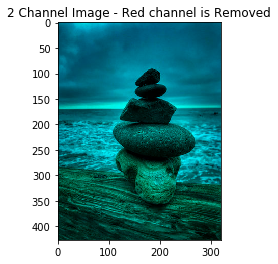

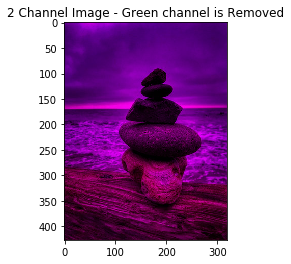

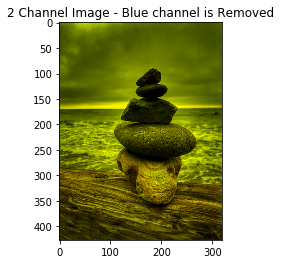

In [4]:
# 0-r, 1-g, 2-b Select a channel to be removed

two_channel_image = rgbExclusion(images[0],0) #Removing Red Channel
displayImage(two_channel_image,"2 Channel Image - Red channel is Removed")

two_channel_image = rgbExclusion(images[0],1) #Removing Green Channel
displayImage(two_channel_image,"2 Channel Image - Green channel is Removed")

two_channel_image = rgbExclusion(images[0],2) #Removing Blue Channel
displayImage(two_channel_image,"2 Channel Image - Blue channel is Removed")


<b> Task 2.3 ( Histogram Equalization ) </b>

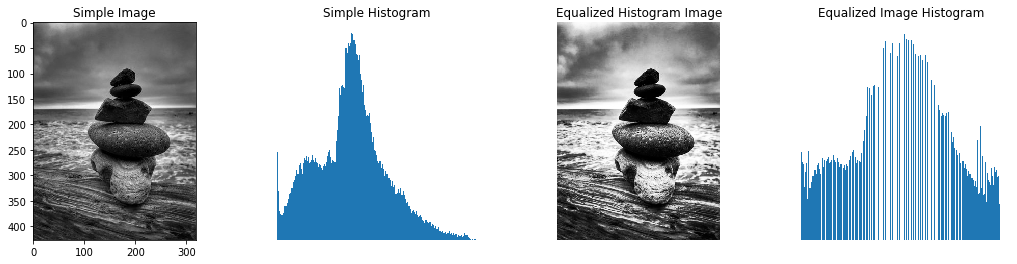

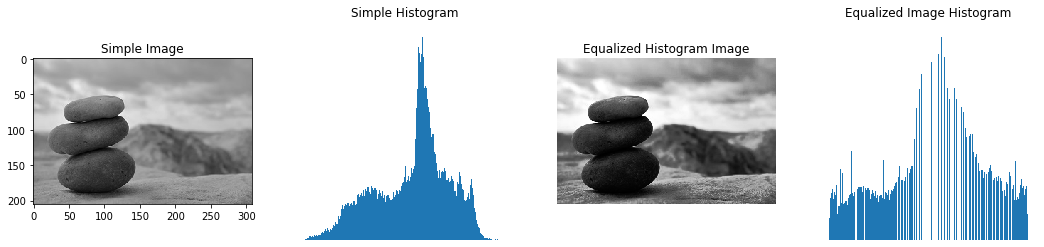

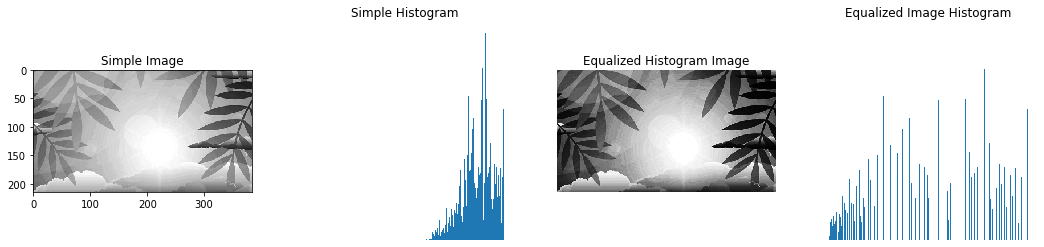

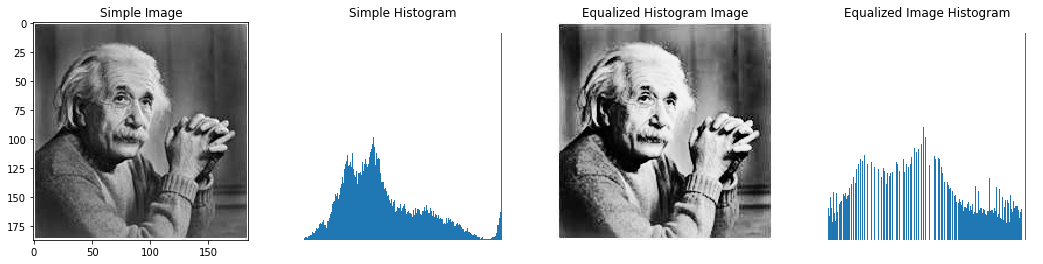

In [5]:
for i in range(4):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images_grey[i], cmap="gray") #Simple Image
    ax1.set_title("Simple Image")
    ax2.axis("off")
    ax2.hist(images_grey[i].ravel(),256,[0,256]) #Simple Image Histogram
    ax2.set_title("Simple Histogram")
    ax3.axis("off")
    ax3.imshow(cv.equalizeHist(images_grey[i]), cmap="gray") #Equalized Image
    ax3.set_title("Equalized Histogram Image")
    ax4.axis("off")
    ax4.hist(cv.equalizeHist(images_grey[i]).ravel(),256,[0,256]) #Equalized Image Histogram
    ax4.set_title("Equalized Image Histogram")
plt.show()

<b> Task 2.4 ( Convolution Operation ) </b>

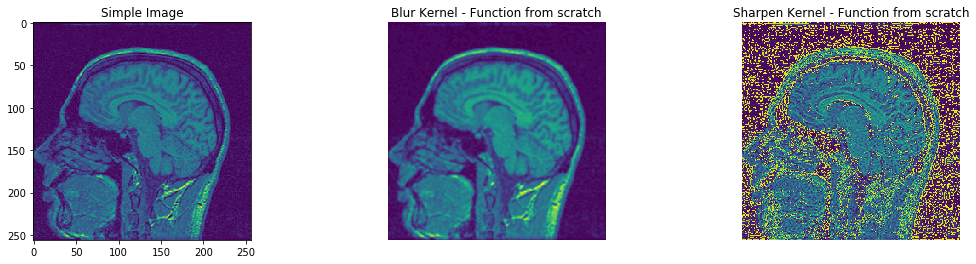

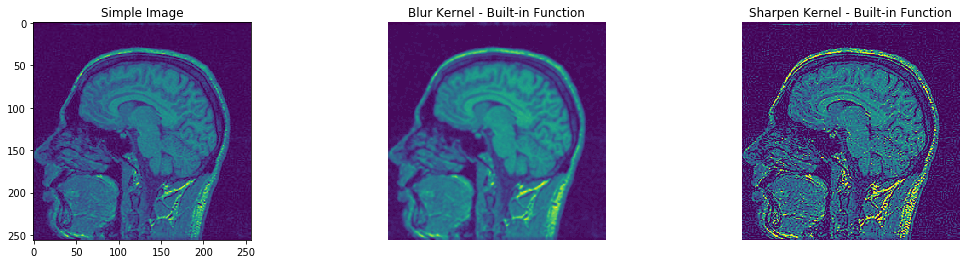

In [6]:
#Convolved Image using OpenCV
blur_kernel = np.ones((3,3),np.float32)/49 #using 3x3 kernel for blur
sharpen_kernel = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int") #using 3x3 kernel for sharpening edges

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 4))
plt.axis("off")
ax1.imshow(images_grey[7])
ax1.set_title("Simple Image") #Simple image

ax2.axis("off")
ax2.imshow(myConvolve2d(images_grey[7],blur_kernel)) #Self built function to move kernel over the image to blur
ax2.set_title("Blur Kernel - Function from scratch")

ax3.axis("off")
ax3.imshow(myConvolve2d(images_grey[7],sharpen_kernel)) #Self built function to move kernel over the image to sharpen
ax3.set_title("Sharpen Kernel - Function from scratch")
plt.show()

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 4))
plt.axis("off")
ax1.imshow(images_grey[7])
ax1.set_title("Simple Image")

ax2.axis("off")
ax2.imshow(cv.filter2D(images_grey[7],-1,blur_kernel)) #Built-in function for blur of OpenCV
ax2.set_title("Blur Kernel - Built-in Function")

ax3.axis("off")
ax3.imshow(cv.filter2D(images_grey[7],-1,sharpen_kernel)) #Built-in function for sharpening of OpenCV
ax3.set_title("Sharpen Kernel - Built-in Function")

plt.show()

<b> Task 2.5.1 & 2.5.2 (Applying box filter and Gaussian filter) </b>

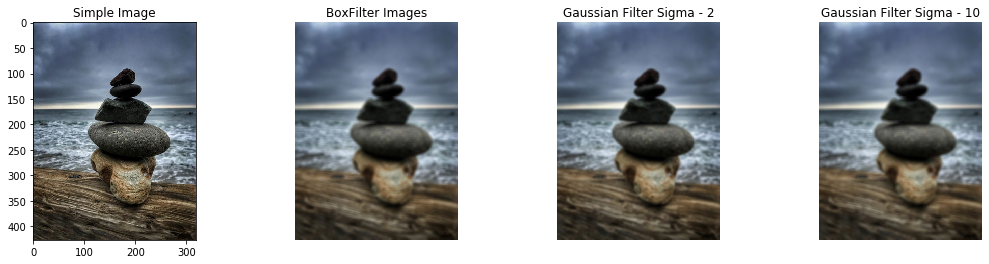

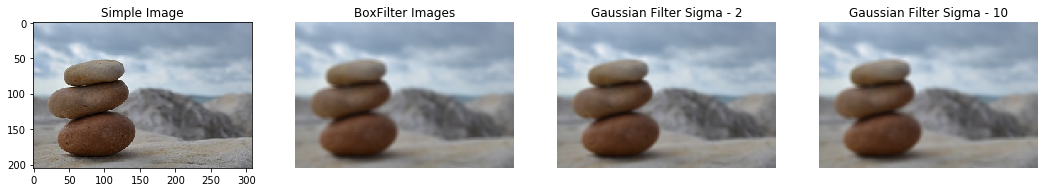

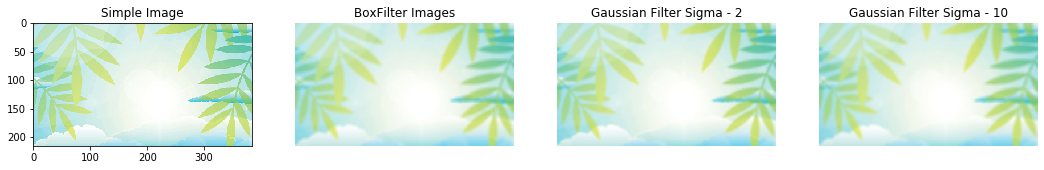

In [7]:
for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images[i])
    ax1.set_title("Simple Image")
    ax2.axis("off")
    ax2.imshow(cv.boxFilter(images[i],0,(7,7))) #Using built-in function of box
    ax2.set_title("BoxFilter Images")
    ax3.axis("off")
    ax3.imshow(cv.GaussianBlur(images[i],(7,7),2)) #Using built-in function of gaussian blur with sigma 2
    ax3.set_title("Gaussian Filter Sigma - 2")
    ax4.axis("off")
    ax4.imshow(cv.GaussianBlur(images[i],(7,7),10)) #Using built-in function of gaussian blur with sigma 10
    ax4.set_title("Gaussian Filter Sigma - 10")
plt.show()

<b> Task 2.5.3 & 2.5.4 (Apply Gaussian and Median filter on noisy image) </b>

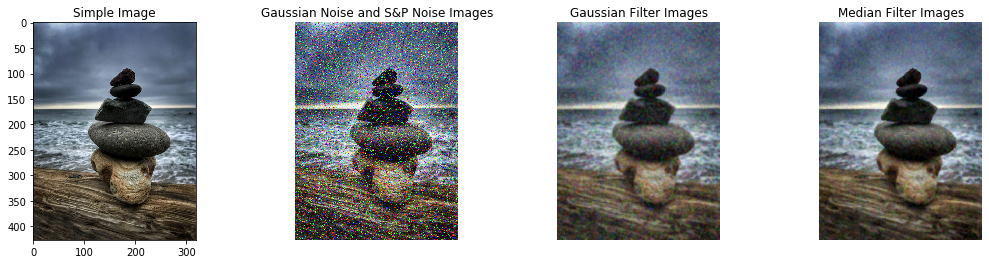

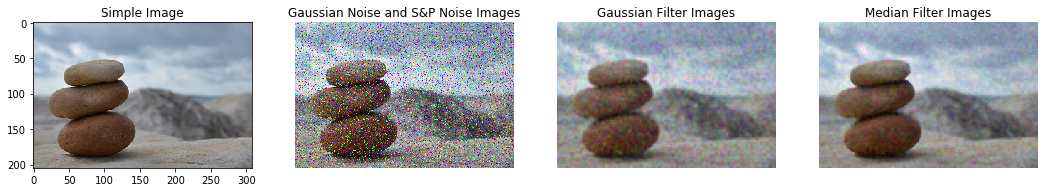

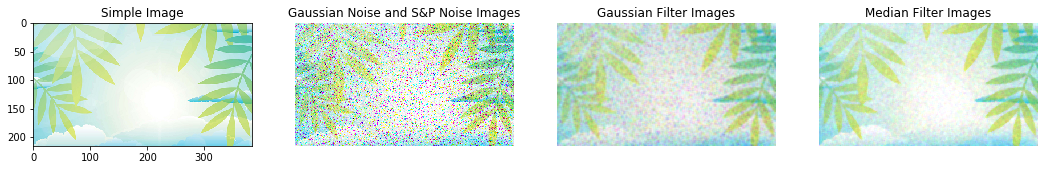

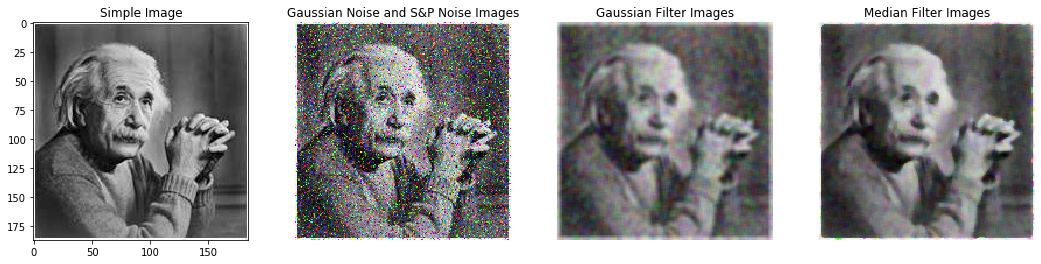

In [8]:
for i in range(4):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images[i])
    ax1.set_title("Simple Image")
    ax2.axis("off")
    gaussian_noise_image = random_noise(images[i], mode='gaussian') #Using skimage to add Gaussian noise
    gaussian_noise_and_sp_image = random_noise(gaussian_noise_image, mode='s&p',amount=0.1)  #Using skimage to add sal and pepper noise
    ax2.imshow(gaussian_noise_and_sp_image) #Displaying noisy image
    ax2.set_title("Gaussian Noise and S&P Noise Images")
    ax3.axis("off")
    ax3.imshow(cv.GaussianBlur(gaussian_noise_and_sp_image,(5,5),5)) #Applying 5x5 gaussian filter over noisy image
    ax3.set_title("Gaussian Filter Images")
    ax4.axis("off")
    ax4.imshow(cv2.medianBlur(np.float32(gaussian_noise_and_sp_image),5)) #Applying Median blur over noisy image
    ax4.set_title("Median Filter Images")
plt.show()

<b> Task 2.5.5 </b>

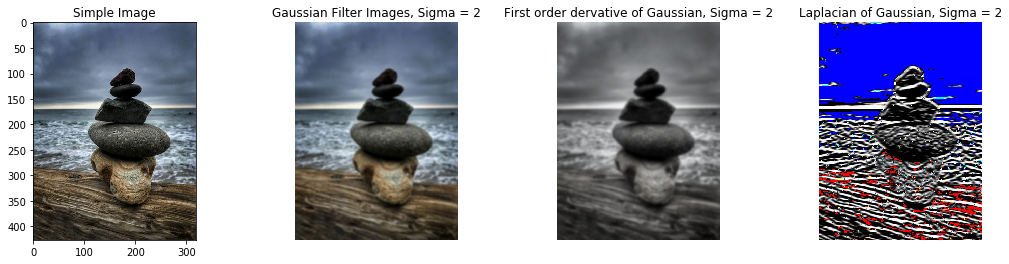

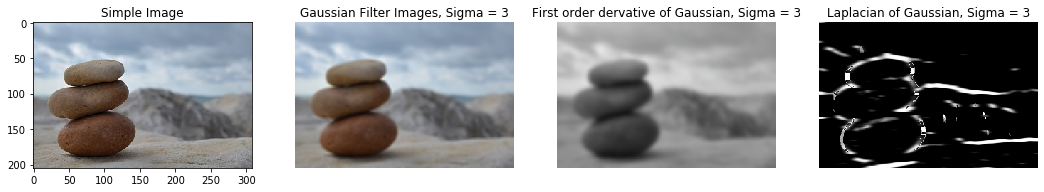

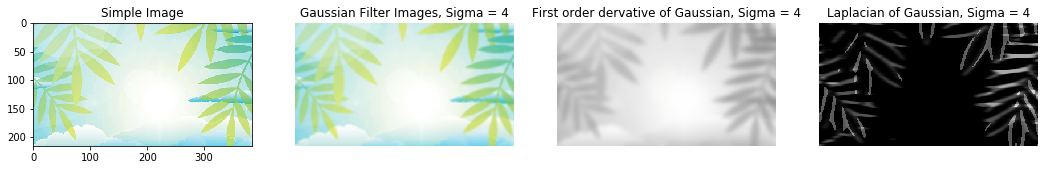

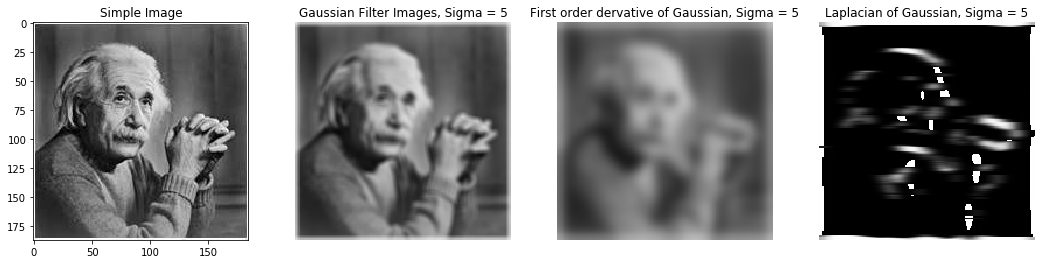

In [9]:
for i in range(4):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images[i])
    ax1.set_title("Simple Image")
    
    ax2.axis("off")
    ax2.imshow(cv.GaussianBlur(images[i],(5,5),sigmaX=2+i)) #Applying Gaussian filter with sigma 2-5 
    title = "Gaussian Filter Images, Sigma = %i" % (2+i)
    ax2.set_title(title)
    
    ax3.axis("off")
    ax3.imshow(gaussian_filter(images[i], sigma=2+i)) #Applying Gaussian filter with sigma 2-5
    title = "First order dervative of Gaussian, Sigma = %i" % (2+i)
    ax3.set_title(title)
    
    ax4.axis("off")
    ax4.imshow(gaussian_laplace(images[i], sigma=2+i)) #Applying Laplacian of Gaussian with sigma 2-5
    title = "Laplacian of Gaussian, Sigma = %i" % (2+i)
    ax4.set_title(title)
plt.show()

<b> Task 2.6.1 </b>

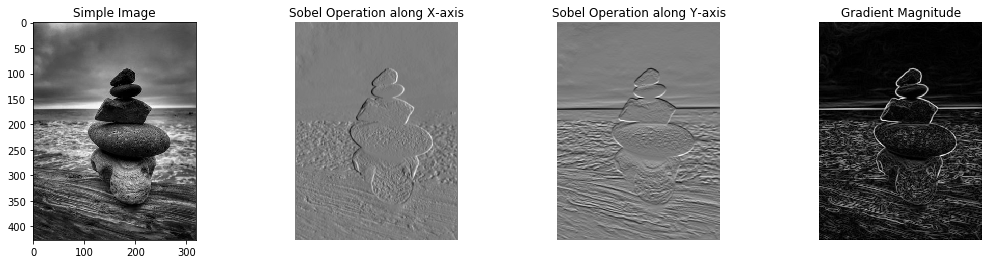

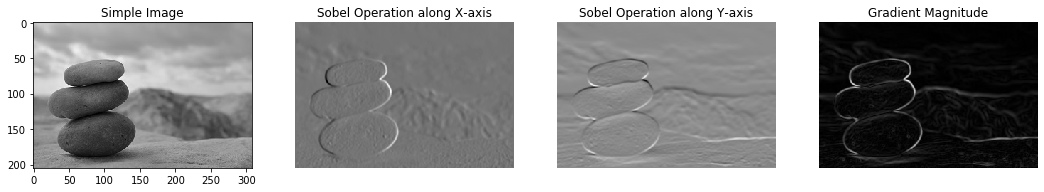

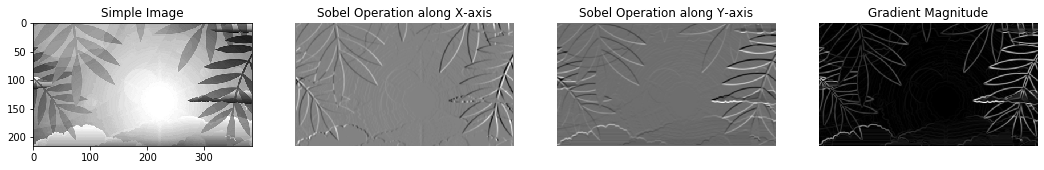

In [10]:
for i in range(3):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images_grey[i],cmap="gray")
    ax1.set_title("Simple Image")
    
    ax2.axis("off")
    sobelx = cv.Sobel(images_grey[i],cv.CV_64F,1,0,ksize=5) #Sobel operatin alog x-axis
    ax2.imshow(sobelx,cmap="gray")
    ax2.set_title("Sobel Operation along X-axis")
    
    ax3.axis("off")
    sobely = cv.Sobel(images_grey[i],cv.CV_64F,0,1,ksize=5) #Sobel operatin alog y-axis
    ax3.imshow(sobely,cmap="gray")
    ax3.set_title("Sobel Operation along Y-axis")
    
    ax4.axis("off")
    gradient_magnitude = np.square(sobelx) + np.square(sobely) #Calculating gradient magnitude
    gradient_magnitude = np.sqrt(gradient_magnitude)
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    ax4.imshow(gradient_magnitude,cmap="gray")
    ax4.set_title("Gradient Magnitude")
    
plt.show()

<b> Task 2.6.2 </b>

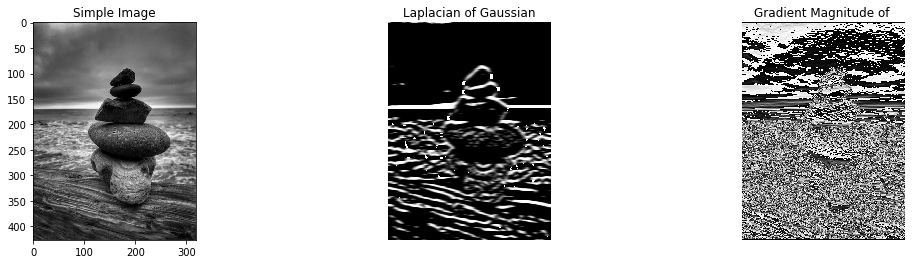

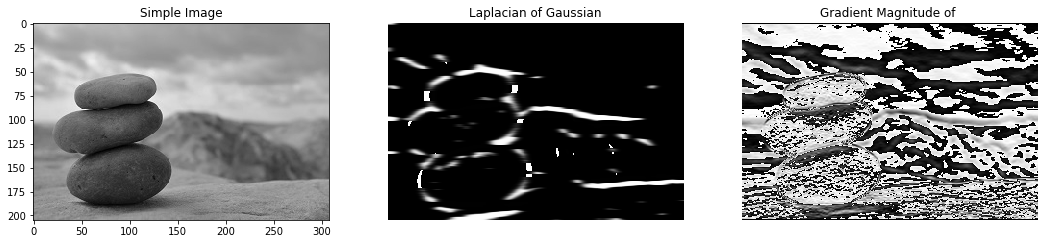

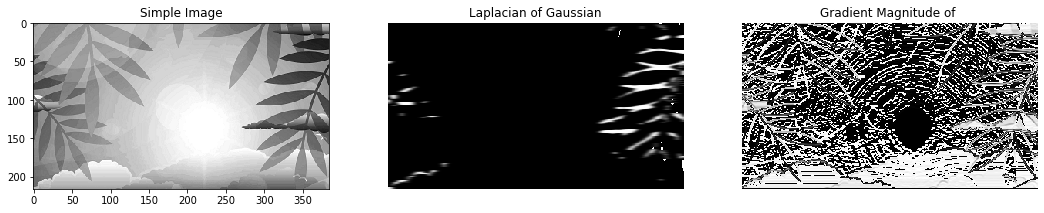

In [11]:
for i in range(3):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images_grey[i],cmap="gray")
    ax1.set_title("Simple Image")
    
    ax2.axis("off")
    lap = gaussian_laplace(images_grey[i], 3) #Applying Laplacian of gaussian from skipy library
    ax2.imshow(lap,cmap="gray")
    ax2.set_title("Laplacian of Gaussian")
    
    ax3.axis("off")
    sobely = np.uint8(cv.Sobel(images_grey[i], cv2.CV_64F, 0, 1))
    ax3.imshow(sobely,cmap="gray")
    ax3.set_title("Gradient Magnitude of ")
    
plt.show()

<b> Task 2.6.3 </b>

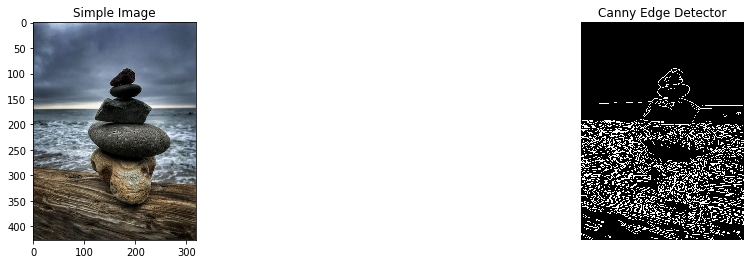

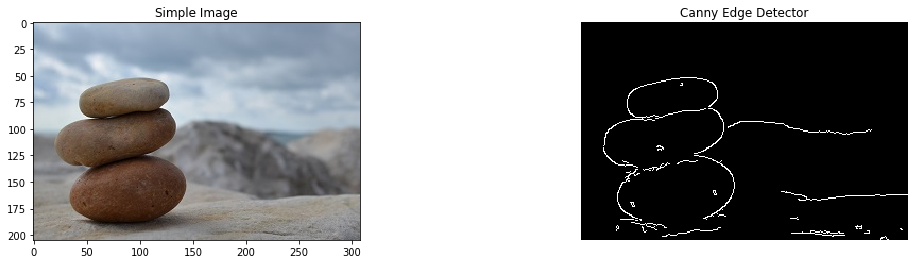

In [12]:
for i in range(2):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 4))
    plt.axis("off")
    ax1.imshow(images[i])
    ax1.set_title("Simple Image")
    
    ax2.axis("off")
    canny = cv.Canny(images[i], 100, 200) #Using Canny edge detector from OpenCV
    ax2.imshow(canny,cmap=plt.cm.gray)
    ax2.set_title("Canny Edge Detector")
    
plt.show()